In [1]:
import pandas as pd
import numpy as np
import os
import re

from src.process_data import fetch_data,process_data

In [3]:
proj_root = '/home/elijahc/dev/ml_ripc'
rel_fp = os.path.join(proj_root,'data','ripc_rel.csv')
print(rel_fp)
raw_df = pd.read_csv(open(rel_fp,mode='rb'),encoding='ISO-8859-1')
# rel_df = process_data(rel_fp)

/home/elijahc/dev/ml_ripc/data/ripc_rel.csv


In [18]:
t_rgx  = lambda l: re.compile(r"(\d+{}).?".format(l))
bsl_rgx = re.compile(r"(\d+A)")
col_vec = list(filter(bsl_rgx.search,list(raw_df.columns)))

In [19]:
baseline = raw_df[col_vec].as_matrix()

In [20]:
col_list = list(raw_df.columns)

In [24]:
dat_mat = [raw_df[list(filter(t_rgx(l).search,col_list))].as_matrix() for l in ['A','C','D','E','F','G']]

In [28]:
fc_mat = [final/baseline for final in dat_mat]
l2_fc_mat = [np.log2(final/baseline) for final in dat_mat]

In [30]:
[d.shape for d in l2_fc_mat]

[(73815, 30), (73815, 30), (73815, 30), (73815, 30), (73815, 30)]

[array([[0.74456732, 1.27584693, 1.78506548, ..., 4.16876625, 1.10725148,
         1.06051706],
        [0.74452781, 1.27578871, 1.78586901, ..., 4.15932488, 1.10751711,
         1.06066443],
        [0.43194445, 0.93308221, 3.56447345, ..., 3.00026466, 1.21550034,
         0.35694753],
        ...,
        [0.94677624, 1.09159665, 1.30189367, ..., 1.01751983, 0.99566107,
         1.08818694],
        [1.15554168, 1.07249297, 0.81264229, ..., 1.34934818, 1.23487851,
         1.25379018],
        [0.88633874, 0.84065909, 1.36907048, ..., 1.27805715, 1.32940757,
         1.1338554 ]]),
 array([[0.85207752, 1.13252556, 1.15051502, ..., 2.69908427, 1.14105271,
         1.46501514],
        [0.85202558, 1.13268352, 1.1507157 , ..., 2.69211484, 1.14129496,
         1.46534727],
        [0.45637886, 0.70293963, 1.31996671, ..., 1.16773666, 1.24678461,
         1.45278874],
        ...,
        [1.4389468 , 1.90094815, 0.3080485 , ..., 1.20132975, 1.10214886,
         1.35059976],
        [1.0

In [22]:
compounds = list(rel_df['Molecular Weight'].unique())

In [38]:
rel_df[(rel_df.pt=='4') & (rel_df.timepoint=='E')]

,Name,Formula,Molecular Weight,variable,value,timepoint,pt,min
2952600,Oxaloacetic acid,C4 H4 O5,132.00541,4E,5.172638e+06,E,4,6
2952601,Oxaloacetic acid,C4 H4 O5,132.00594,4E,5.168030e+06,E,4,6
2952602,Citric acid,C6 H8 O7,192.02667,4E,4.305290e+06,E,4,6
2952603,Dimethylphosphinic fluoride,C2 H6 F O P,96.01339,4E,4.188017e+06,E,4,6
2952604,alpha-Ketoglutaric acid,C5 H6 O5,146.02116,4E,2.455179e+06,E,4,6
2952605,Hexaric acid,C6 H10 O8,210.03775,4E,2.402937e+06,E,4,6
2952606,NaN,NaN,156.05033,4E,4.181893e+06,E,4,6
2952607,Citric acid,C6 H8 O7,192.02671,4E,1.049670e+06,E,4,6
2952608,alpha-Ketoglutaric acid,C5 H6 O5,146.02170,4E,1.846523e+06,E,4,6
2952609,alpha-Ketoglutaric acid,C5 H6 O5,146.02098,4E,1.803607e+06,E,4,6


In [25]:
rel_df.size

212587200

In [18]:
rel_df['Molecular Weight'].unique

<bound method Series.unique of 0            132.00541
1            132.00594
2            192.02667
3             96.01339
4            146.02116
5            210.03775
6            156.05033
7            192.02671
8            146.02170
9            146.02098
10           292.09135
11           292.09230
12           246.08590
13           292.09138
14           330.03652
15           146.02153
16           192.02655
17           330.03658
18           282.25668
19           280.24100
20           292.08875
21            96.01849
22            96.01792
23           142.02339
24           256.24088
25           376.30156
26            73.02251
27           142.02335
28           142.02333
29           390.31746
               ...    
26573370     128.09867
26573371    1003.67002
26573372     206.03502
26573373     636.38848
26573374     128.06792
26573375     571.36412
26573376     116.08493
26573377     113.02230
26573378      68.06298
26573379     100.00414
26573380    1260.89536
265

In [5]:
rel_df[rel_df['Molecular Weight']==96.01849]

,Name,Formula,Molecular Weight,variable,value,timepoint,pt,min
21,DOJ1I8IOXE,C3 H3 F3,96.01849,1A,7.051115e+06,A,1,0
73836,DOJ1I8IOXE,C3 H3 F3,96.01849,1B,5.627487e+06,B,1,0
147651,DOJ1I8IOXE,C3 H3 F3,96.01849,1C,6.837779e+06,C,1,2
221466,DOJ1I8IOXE,C3 H3 F3,96.01849,1D,2.819086e+06,D,1,4
295281,DOJ1I8IOXE,C3 H3 F3,96.01849,1E,1.145414e+07,E,1,6
369096,DOJ1I8IOXE,C3 H3 F3,96.01849,1F,6.767999e+06,F,1,8
442911,DOJ1I8IOXE,C3 H3 F3,96.01849,1G,1.478383e+06,G,1,10
516726,DOJ1I8IOXE,C3 H3 F3,96.01849,1H,9.042909e+06,H,1,20
590541,DOJ1I8IOXE,C3 H3 F3,96.01849,1I,5.528469e+06,I,1,30
664356,DOJ1I8IOXE,C3 H3 F3,96.01849,1J,9.816534e+06,J,1,45


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([360.,   0.,   0., 360.,   0.,   0.,   0., 360.,   0., 360.]),
 array([96.01792 , 96.018077, 96.018234, 96.018391, 96.018548, 96.018705,
        96.018862, 96.019019, 96.019176, 96.019333, 96.01949 ]),
 <a list of 10 Patch objects>)

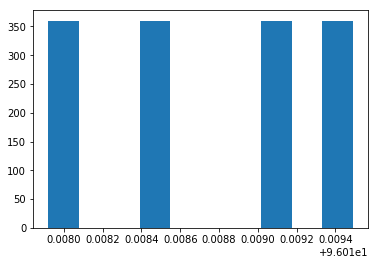

In [15]:
plt.hist(rel_df[rel_df['Name']=='DOJ1I8IOXE']['Molecular Weight'])

In [8]:
metabolite='DOJ1I8IOXE'
rel_df[rel_df.Name==metabolite]

,Name,Formula,Molecular Weight,variable,value,timepoint,pt,min
21,DOJ1I8IOXE,C3 H3 F3,96.01849,1A,7.051115e+06,A,1,0
22,DOJ1I8IOXE,C3 H3 F3,96.01792,1A,6.959092e+06,A,1,0
609,DOJ1I8IOXE,C3 H3 F3,96.01912,1A,2.650900e+05,A,1,0
612,DOJ1I8IOXE,C3 H3 F3,96.01949,1A,2.649781e+05,A,1,0
73836,DOJ1I8IOXE,C3 H3 F3,96.01849,1B,5.627487e+06,B,1,0
73837,DOJ1I8IOXE,C3 H3 F3,96.01792,1B,5.429451e+06,B,1,0
74424,DOJ1I8IOXE,C3 H3 F3,96.01912,1B,1.934787e+05,B,1,0
74427,DOJ1I8IOXE,C3 H3 F3,96.01949,1B,3.744130e+05,B,1,0
147651,DOJ1I8IOXE,C3 H3 F3,96.01849,1C,6.837779e+06,C,1,2
147652,DOJ1I8IOXE,C3 H3 F3,96.01792,1C,6.869875e+06,C,1,2


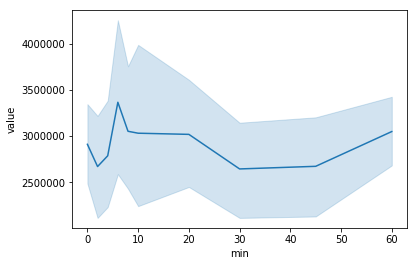

In [9]:
metabolite='DOJ1I8IOXE'
sns.lineplot(x='min',y='value',data=rel_df[rel_df.Name==metabolite])

In [10]:
pd.to_pickle(rel_df,'../data/ripc_rel.pk')

In [11]:
rel_df.to_

AttributeError: 'DataFrame' object has no attribute 'to_'

In [ ]:
# pd.to_pickle(rel_df,os.path.join(proj_root,'data','ripc_rel_quant.df'))